<a href="https://colab.research.google.com/github/kevin09jung/scratch/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%890608.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝

- 수치를 예측하는 회귀, 카테고리를 예측하는 분류, 최적의 추천 등을 수행하는 소프트웨어로, 데이터를 보고 학습하여 점차 성능이 개선된다
- 현재 인공지능을 구현하는 대표적인 방법이 머신러닝 기법이다
 - 인공지능을 구현하는 다른 방법으로 "생각하는" 컴퓨터를 만들거나, 언어를 문법적으로 이해하는 컴퓨터를 만드는 것, 또는 사람의 지식을 알고리즘이나 데이터로 구축하는 방법은 성공하지 못했다
 

- 머신러닝 동작
<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-12-29%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.08.38.png?raw=1" align='left'>

### 데이터 (X)
- 훈련 (train) 데이터: 모델을 학습시키는데 사용하는 데이터
- 검증 (validation) 데이터: 학습시킨 모델의 동작을 검증하는데 사용하는 데이터
- 학습에 사용하는 데이터가 많을수록 예측, 추천 성능이 향상된다
 - 데이터 타입: 정형 데이터(테이블 데이터), 비정형 데이터(이미지, 텍스트, 센서 데이터 등)
- 머신러닝 모델의 성능을 높이기 위해서는 원시(raw) 데이터로부터 적절한 학습 및 검증 데이터를 만드는 **데이터 전처리**가 반드시 필요하다

### 머신러닝 모델
- 입력 데이터(X)로부터 최적의 출력(y)을 얻는 소프트웨어
- 최적의 출력이란 정답(label, target)을 잘 예측하는 것을 말한다
 - 최적의 출력을 얻기 위해서 모델을 구성하는 파라미터의 최적치를 찾는다(예: 선형 회귀에서 가중치 값)
- 모델의 종류: 선형모델, 로지스틱 회귀, SVM, 결정트리, 랜덤 포레스트, kNN, 베이시언, 딥러닝 모델 (MLP, CNN, RNN 등)

### 목적
- 머신러닝의 목적은 다음 중 하나이다
 - 예측(predictive) 분석
> 회귀 예측(regression): 수치를 예측  
> 분류 예측(classification): 카테고리를 예측
 - 설명(descriptive)적 분석
 - 군집화(clustering)
 - 추천(recommendation)
 
### 성능평가 (performance measure)
- 모델이 원하는 동작을 잘 수행하는지를 평가하는 값으로, 주요 평가 척도는 다음과 같다
 - 회귀모델에서는 R-squared를 사용
 - 분류 모델에서는 정확도(accuracy), 정밀도(precision), 리콜(recall), f-1 점수, ROC-AUC 등을 사용 
 
### 최적화기 (optimizer)
- 학습을 통하여 모델 파라미터를 최적의 값으로 수렴시키는 알고리즘
- 최적화 알고리즘으로는 경사하강법(GD: gradient descent)이 기본적으로 사용된다 

### 손실함수 (loss function)
- 최적화기는 손실함수를 최소화 하는 방향으로 동작한다
- 즉, 손실함수는 최적화기의 동작이 잘 이루어지고 있는지를 모니터링하는 값이다
- 손실함수로, 회귀 모델에서는 MSE(mean square error)를, 분류에서는 크로스 엔트로피(cross entrophy)를 주로 사용한다


# 타이타닉 생존자 예측 

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-07%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.36.15.png?raw=1" width=400 align='left'>

# 데이터
- 타이타닉 탑승자 개인별 데이터를 보고 생존 여부를 예측하는 예제 데이터

- Survival - 생존여부(타겟변수 y): 0 = No, 1 = Yes
- Pclass - 티켓 등급: 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex - 성별: male, female
- Age - 나이
- SibSp - 동승한 형제, 배우자 수
- Parch - 부모와 자녀의 수
- Ticket - 티켓 번호
- Fare - 승선 요금
- Cabin - 캐빈(객실) 번호
- Embarked - 승선한 항구: C = Cherbourg, Q = Queenstown, S = Southampton

## import

In [ ]:
## 환경설정

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# 맥에서 레티나 디스플레이 사용 설정
%config InlineBackend.figure_format = 'retina'

# 그림 크기와 폰트 설정
matplotlib.rcParams['figure.figsize'] = (6,4)
plt.rc('font', size=13)


## 데이터 전처리 종류

- 데이터 클리닝 - 결측치 처리, 틀린값 처리
- 스케일링 - 여러 변수 값의 범위를 동등한 조건으로 맞추는 것: 표준 스케일링, min-max 스케일링
- 이상치 처리 - 이상치 탐지 및 제거
- 데이터 변환 - 로그 변환, 카테고리 인코딩 등

In [ ]:
## 데이터 전처리 전과정 실행

# 데이터 다운로드하기
df = pd.read_csv("https://raw.githubusercontent.com/StillWork/data/master/titanic_train.csv")

# 나이 결측치를 평균 나이로 대체 (대체한 것을 즉시 반영했다)
df.Age.fillna(df.Age.mean(), inplace=True)

# Embarked (항구명) 결측치가 있는 두 샘플은 삭제한다
df = df[~df["Embarked"].isnull()]

# 사용하지 않을 컬럼 4개를 삭제한 데이터프레임을 만들고 백업한다
df = df[df.columns.difference(['PassengerId','Name','Ticket','Cabin'])]

# 선실등급, 성별, 항구명을 원핫 인코딩한다
df = pd.get_dummies(df, columns=['Pclass','Sex','Embarked'])

# 요금(Fare)은 로그를 취한 값을 사용한다
df["Fare"] = np.log(df.Fare +1)

# 연속형 변수에 표준 스케일링을 적용한다
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age','Fare','SibSp','Parch']] = scaler.fit_transform(df[['Age','Fare','SibSp','Parch']])

# 데이터분석에 사용할 X와 y 얻기
X = df[df.columns.difference(['Survived'])]
y = df.Survived

# X, y 확인하기
print(y[:5])
X[:5].T

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


,0,1,2,3,4
Age,-0.590495,0.643971,-0.281878,0.412509,0.412509
Embarked_C,0.000000,1.000000,0.000000,0.000000,0.000000
Embarked_Q,0.000000,0.000000,0.000000,0.000000,0.000000
Embarked_S,1.000000,0.000000,1.000000,1.000000,1.000000
Fare,-0.877591,1.366380,-0.796281,1.066796,-0.781901
Parch,-0.474326,-0.474326,-0.474326,-0.474326,-0.474326
Pclass_1,0.000000,1.000000,0.000000,1.000000,0.000000
Pclass_2,0.000000,0.000000,0.000000,0.000000,0.000000
Pclass_3,1.000000,0.000000,1.000000,0.000000,1.000000
Sex_female,0.000000,1.000000,1.000000,1.000000,0.000000


# 선형 분류 예측
- 개인별 정보를 보고 이 사람의 생존 여부를 예측하는 선형 분류 모델을 만들어 보겠다
- 분류에 대해서는 "머신러닝"에서 자세히 설명한다

## 이진 분류를 위한 결정 경계 (decision boundary)
- 하나의 변수만 사용하는 경우 선형분류 결정 경계: $x_{1} > b$  
- 두 개의 변수를 사용하는 경우 선형분류 결정 경계: $a_{1}x_{1}+a_{2}x_{2}+b >0$  
     > $x_{2} > -$$a_{1}\over a_{2}$ $x_{1} - $$b\over{a_{2}}$


<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-09%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%205.19.06.png?raw=1" width=550 align='left'>


## 모델 훈련 및 성능 측정


- 목적 변수
 - 분류 예측 대상 데이터로서 여기서는 생존 여부 데이터인 Survived 컬럼의 값이다

In [ ]:
p = np.arange(10)
q= p*10
p,q

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]))

In [ ]:
# #  train_test_split(p,q, test_size=0.4, random_state=11)
# train_test_split(p,q, test_size=0.4,shuffle=False)

In [ ]:
#  X = X[['Sex_female','Age','Fare']]

In [ ]:
## X와 y를 훈련 데이터와 검증 데이터로 나눈다 (디폴트 비율은 75%: 25%)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# 훈련 및 검증 데이터 갯수 확인
len(X_train), len(X_test)

(666, 223)

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-12-29%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2011.45.47.png?raw=1" width=300 align='left'>

In [ ]:
## 선형 분류 모델로 SGDClassifier를 사용

# 모델 생성
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()

# 학습 데이터를 사용하여 학습을 수행한다
model.fit(X_train, y_train)

# 검증 데이터를 사용하여 모델의 성능을 확인한다 (정확도를 알려준다)
model.score(X_test, y_test)

0.7533632286995515

In [ ]:
X_test[:5]

,Age,Embarked_C,Embarked_Q,Embarked_S,Fare,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp
703,-0.359033,0,1,0,-0.817737,-0.474326,0,0,1,0,1,-0.475199
202,0.335355,0,0,1,-0.976712,-0.474326,0,0,1,0,1,-0.475199
347,0.003524,0,0,1,-0.124012,-0.474326,0,0,1,1,0,0.431350
610,0.721125,0,0,1,0.532740,5.726787,0,0,1,1,0,0.431350
822,0.643971,0,0,1,-3.059355,-0.474326,1,0,0,0,1,-0.475199


In [ ]:
y_pred = model.predict(X_test)
(y_pred == y_test).mean() # accuracy 정확도를 구하는 것, score() 함수의 결과값

0.7533632286995515

In [ ]:
df2 = X_test.copy()
scores = model.decision_function(X_test)
df2['scores'] = scores
worst_sc_index = df2.sort_values('scores')[:5].index

In [ ]:
X_test.loc[worst_sc_index]

,Age,Embarked_C,Embarked_Q,Embarked_S,Fare,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp
201,0.003524,0,0,1,1.341285,2.006119,0,0,1,0,1,6.777195
324,0.003524,0,0,1,1.341285,2.006119,0,0,1,0,1,6.777195
59,-1.439190,0,0,1,0.940950,2.006119,0,0,1,0,1,4.057548
116,3.151480,0,1,0,-0.816755,-0.474326,0,0,1,0,1,-0.475199
176,0.003524,0,0,1,0.327607,0.765897,0,0,1,0,1,2.244449


In [ ]:
live_death_index = (y_test > y_pred).index

In [ ]:
X_test[:10]

,Sex_female,Age,Fare
346,1,0.798279,-0.330815
744,0,0.103892,-0.796281
372,0,-0.821957,-0.781901
347,1,0.003524,-0.124012
56,1,-0.667649,-0.534196
865,1,0.952587,-0.330815
802,0,-1.439190,1.899046
317,0,1.878437,-0.259483
711,0,0.003524,0.369083
636,0,0.181046,-0.796281


In [ ]:
y_test[:10], y_pred[:10]


(346    1
 744    1
 372    0
 347    1
 56     1
 865    1
 802    1
 317    0
 711    0
 636    0
 Name: Survived, dtype: int64,
 array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0]))

In [ ]:
model.coef_

array([[2.16216216, 0.21070056, 0.31125437]])

In [ ]:
model.coef_, model.intercept_

(array([[2.16216216, 0.21070056, 0.31125437]]), array([-1.13903861]))

In [ ]:
X.columns

Index(['Age', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Fare', 'Parch',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp'],
      dtype='object')

In [ ]:
## 각 특성이 얼마나 중요하게 반영되었는지를 본다

W = pd.DataFrame(model.coef_[0].round(4), index=X3.columns
                , columns=['weight'])
W.sort_values('weight')

,weight
Age,0.2107
Fare,0.3113
Sex_female,2.1622


<Axes: >

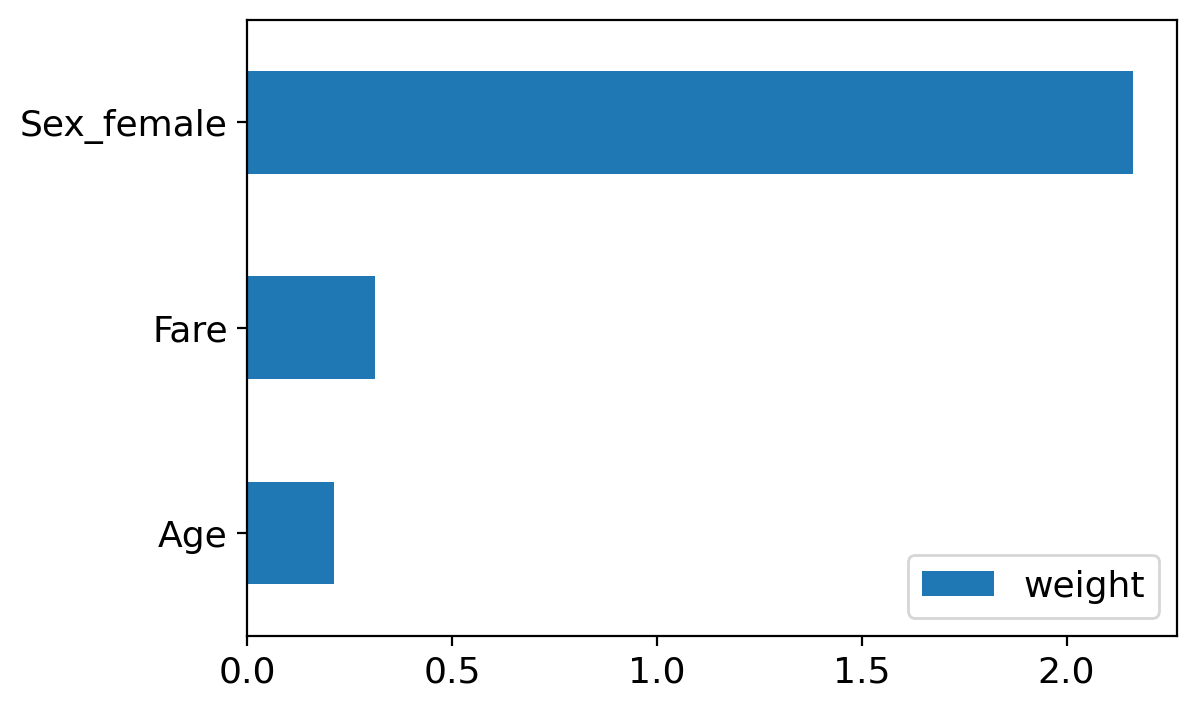

In [ ]:
## 각 특성이 얼마나 중요하게 반영되었는지를 그래프로 보기

W.sort_values('weight').plot(kind='barh')

- 위 결과를 보면 생존하는데 가장 많이 기여한 변수는 여성, 요금, 1등석 등이고
- 생존하지 않는데 가장 많이 기여한 변수는 남성, 나이, 3등객실 등인 것을 알 수 있다

## (1) 특성을 3개만 (임의로) 선택하여 X를 바꾸고 모델의 성능을 확인한다
- 선택한 특성들을 바꾸어 본다

## (2) 사망할 점수가 가장 높은 사람 5명을 찾아본다 (X_test 중에서)
- 힌트: decision_fuction()으로 얻는 점수를 사용한다  

## (3) 실제 생존자를 사망으로 예측한 테스트 샘플들을 찾아보시오(X_test 중에서)
- 힌트 y_test는 1, y_pred은 0인 샘플 찾기

In [ ]:
y_pred

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0])

In [ ]:
X_test[y_test > y_pred]

,Sex_female,Age,Fare
744,0,0.103892,-0.796281
802,0,-1.439190,1.899046
36,0,0.003524,-0.880201
549,0,-1.670653,0.694746
340,0,-2.133577,0.348233
707,0,0.952587,0.359184
621,0,0.952587,1.056312
271,0,-0.359033,-3.059355
828,0,0.003524,-0.816755
512,0,0.489663,0.359184
